# Compound events and Southern Annular Mode

Export figure data from the original publication's code base here: https://github.com/dougrichardson/wind_solar_drought/blob/main/3_modes.ipynb

In [36]:
import xarray as xr
import numpy as np
import regionmask

%matplotlib inline
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy
cartopy.config['pre_existing_data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data/'
cartopy.config['data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data/'

In [5]:
%cd /g/data/w42/dr6273/work/project_demo

/g/data/w42/dr6273/work/project_demo


In [25]:
FONTSIZE = 8
plt_params = {
    'font.size': FONTSIZE,
    'legend.fontsize' : FONTSIZE - 1,
}

In [8]:
d = xr.open_dataset("./SAM_compound_freq.nc")["events"]

In [12]:
mask = regionmask.defined_regions.natural_earth_v5_0_0.land_110.mask(d["lon"], d["lat"])

In [20]:
d2 = d.where(mask == 0)

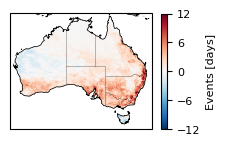

In [49]:
with plt.rc_context(plt_params):
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(2.5, 1.5))
    ax.coastlines(lw=0.5)
    ax.add_feature(
        cartopy.feature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces',
            scale='10m'
        ),
        facecolor='none',
        edgecolor='k',
        lw=.1,
        rasterized=True
    )
    p = d2.plot(ax=ax, vmax=12, cbar_kwargs={'ticks': np.arange(-12, 13, 6), "label": "Events [days]"})
    ax.set_title("")
    plt.savefig("./figures/SAM.pdf", format="pdf", dpi=400, bbox_inches="tight")